**Build simple CNN by using cifar10 dataset.**
1. load dataset
2. check train/test data: shape, images
3. Data preprocessing & Target(Answer preprocessing)
4. Build model: Sequential, add layer(conv2d, pooling...flattern, dense...)
5. compile model: set Loss, Optimizer, metrics...
6. fit the model
7. evaluate the model
8. Predict -> Confusion matrix
9. show correct/incorrect labels and incorrect images

In [24]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [25]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [26]:
transform = ['airplane', 'automobile ', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck']							

dog


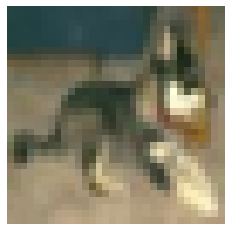

In [27]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis('off')
# print(y_train[c])

# transform[0] -> airplane
# XX -> trasform[[0]] --> not working
category = y_train[c][0] # y_train[c] 是list, 取出[0]得到target number
print(transform[category]) 
plt.imshow(x_train[c])

In [28]:
# Data Preprocessing
# Convolution --> 不需要拉平
x_train_shaped = x_train / 255 
x_test_shaped = x_test / 255 

# Demo: x_train_shaped
x_train_shaped[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [29]:
# 2. Answer Preprocessing --> One-hot encoding
# Ans: [P0, P1, P2.....P9]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print('before one-hot encoding: ', y_train[100])
print('after one-hot encoding:', y_train_cat[100])

before one-hot encoding:  [8]
after one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [30]:
from keras.models import Sequential
from keras.layers import Dense
# Conv
from keras.layers import Conv2D, MaxPool2D, Flatten
cnn = Sequential()
# parameter: one filter-> 3 x 3 x 3 x 32 = 864, 864 + 32(bias) = 896
cnn.add(Conv2D(32, (3,3),
               input_shape=(32,32,3),
               padding='same',
               activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
# parameter: one filter-> 3 x 3 x 32 x 64(filter) + 32(bias) = 18496
cnn.add(Conv2D(64, (3,3),
               padding='same',
               activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Conv2D(128, (3,3),
               padding='same',
               activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [31]:
# confirm the training model
cnn.compile(loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'],
                    optimizer = 'adam')

In [32]:
# training your model
cnn.fit(x_train_shaped, 
        y_train_cat, 
        batch_size=200, 
        epochs= 10, 
        validation_split=0.1 )

Epoch 1/10
225/225 [==============================] - 2s 8ms/step - loss: 1.8453 - accuracy: 0.3231 - val_loss: 1.3074 - val_accuracy: 0.5390
Epoch 2/10
225/225 [==============================] - 1s 6ms/step - loss: 1.2630 - accuracy: 0.5454 - val_loss: 1.1469 - val_accuracy: 0.6082
Epoch 3/10
225/225 [==============================] - 1s 6ms/step - loss: 1.0249 - accuracy: 0.6410 - val_loss: 0.9821 - val_accuracy: 0.6656
Epoch 4/10
225/225 [==============================] - 1s 6ms/step - loss: 0.9062 - accuracy: 0.6864 - val_loss: 0.9016 - val_accuracy: 0.6942
Epoch 5/10
225/225 [==============================] - 1s 6ms/step - loss: 0.8243 - accuracy: 0.7131 - val_loss: 0.8146 - val_accuracy: 0.7234
Epoch 6/10
225/225 [==============================] - 1s 6ms/step - loss: 0.7459 - accuracy: 0.7407 - val_loss: 0.7873 - val_accuracy: 0.7302
Epoch 7/10
225/225 [==============================] - 1s 6ms/step - loss: 0.6756 - accuracy: 0.7678 - val_loss: 0.7547 - val_accuracy: 0.7436
Epoch 

In [33]:
cnn.evaluate(x_test_shaped, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.7639 - accuracy: 0.7491


[0.7639412879943848, 0.7491000294685364]

In [34]:
# model.predict -> probabilibty; model.predict_classes -> classfication
import pandas as pd
from sklearn.metrics import confusion_matrix

# transform = ['airplane', 'automobile ', 'bird', 'cat', 'deer',
            #  'dog', 'frog', 'horse', 'ship', 'truck']		

pre = cnn.predict_classes(x_test_shaped)
# confusion_matrix(y_test, pre)
pd.DataFrame(confusion_matrix(y_test, pre))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,821,23,34,12,16,12,9,6,39,28
1,20,883,6,13,2,1,2,2,17,54
2,71,8,638,36,89,77,42,19,12,8
3,26,9,88,507,67,213,49,17,12,12
4,11,3,64,42,748,39,44,39,10,0
5,15,3,37,105,38,751,13,25,6,7
6,9,3,56,48,35,33,805,1,6,4
7,16,6,37,36,72,90,8,725,1,9
8,75,41,12,12,9,13,4,3,814,17
9,43,92,11,10,1,14,2,9,19,799


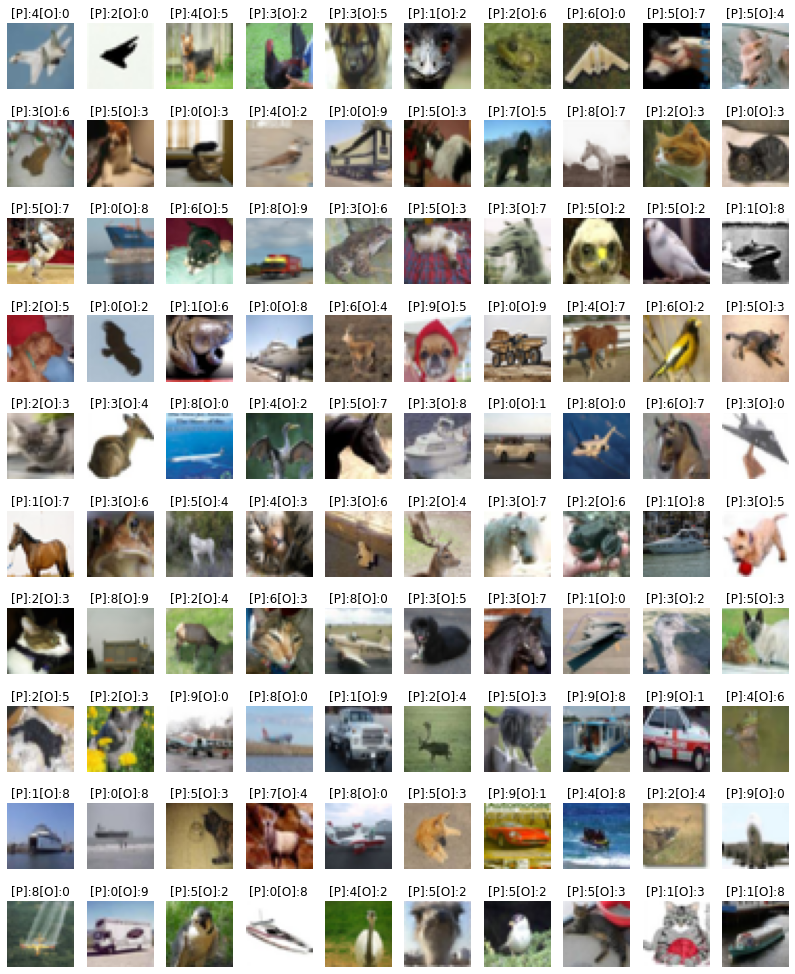

In [35]:
# numpy: compare each numbers of two sets
import numpy as np

# y_test is 2D, pre is 1D -> reshape y_test : 1D
y_test_1d = y_test.reshape(10000)
diff = np.nonzero(pre != y_test_1d)[0]

# Correct label (original data)
orifalse = y_test_1d[diff]
#  Wrong prediction
prefalse = pre[diff]
# take images from x_test dataset
imgfalse = x_test[diff]

# set width, hight fot the plot
plt.figure(figsize=(14,450))
# each row has 10 images
width = 10
hight = len(imgfalse) / 10 + 1
for (i, img) in enumerate(imgfalse[0:100]):
    # (row, column, from i images...)
    plt.subplot(hight, width, i+1)
    plt.axis('off')
    t = '[P]:' + str(prefalse[i]) + '[O]:' + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)

# transform = ['airplane', 'automobile ', 'bird', 'cat', 'deer',
#              'dog', 'frog', 'horse', 'ship', 'truck']		